<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Upsampling</a></span></li><li><span><a href="#Downsampling" data-toc-modified-id="Downsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Downsampling</a></span></li><li><span><a href="#Использование-гиперпараметра-в-случаном-лесе" data-toc-modified-id="Использование-гиперпараметра-в-случаном-лесе-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Использование гиперпараметра в случаном лесе</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

# Описание полей данных

    RowNumber — индекс строки в данных
    CustomerId — уникальный идентификатор клиента
    Surname — фамилия
    CreditScore — кредитный рейтинг
    Geography — страна проживания
    Gender — пол
    Age — возраст
    Tenure — сколько лет человек является клиентом банка
    Balance — баланс на счёте
    NumOfProducts — количество продуктов банка, используемых клиентом
    HasCrCard — наличие кредитной карты
    IsActiveMember — активность клиента
    EstimatedSalary — предполагаемая зарплата

Целевой признак

    Exited — факт ухода клиента

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
#from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, f1_score,
    confusion_matrix, recall_score,precision_score, 
                             precision_recall_curve,roc_auc_score,
                             roc_curve)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-block alert-success">
<b>Успех:</b> Импорты на месте
</div>


In [2]:
df = pd.read_csv('/datasets/Churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [3]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


в столбце tenure есть пропуски

In [4]:
df.duplicated().sum()

0

Дубликатов не найдено

In [5]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [6]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

От столбцов 'RowNumber', 'CustomerId', 'Surname' можно избавиться

In [7]:
# HasCrCard, IsActiveMember, Exited  по своей сути булевы 
#переменные - преобразуем их
df['HasCrCard'] = df['HasCrCard'].astype(bool)
df['IsActiveMember'] = df['IsActiveMember'].astype(bool)
df['Exited'] = df['Exited'].astype(bool)

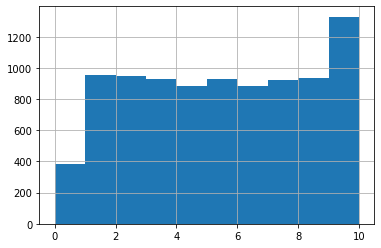

In [8]:
df['Tenure'].hist();

столбец Tenure — сколько лет человек является клиентом банка. судя по гистограмме можено заполнить пропуски медианными значеними

In [9]:
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())

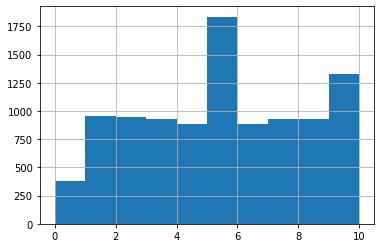

In [10]:
df['Tenure'].hist();

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  bool   
 8   IsActiveMember   10000 non-null  bool   
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  bool   
dtypes: bool(3), float64(3), int64(3), object(2)
memory usage: 654.4+ KB


In [12]:
# подготовим данные OHE
df_ohe = pd.get_dummies(df, columns =['Gender', 'Geography'],
                    drop_first=True)
df_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2.0,0.00,1,True,True,101348.88,True,0,0,0
1,608,41,1.0,83807.86,1,False,True,112542.58,False,0,0,1
2,502,42,8.0,159660.80,3,True,False,113931.57,True,0,0,0
3,699,39,1.0,0.00,2,False,False,93826.63,False,0,0,0
4,850,43,2.0,125510.82,1,True,True,79084.10,False,0,0,1


In [13]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  float64
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  bool   
 6   IsActiveMember     10000 non-null  bool   
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  bool   
 9   Gender_Male        10000 non-null  uint8  
 10  Geography_Germany  10000 non-null  uint8  
 11  Geography_Spain    10000 non-null  uint8  
dtypes: bool(3), float64(3), int64(3), uint8(3)
memory usage: 527.5 KB


In [14]:
# отделим от общей выборки целевой признак
features = df_ohe.drop('Exited', axis=1)
target = df_ohe['Exited']

In [15]:
target.value_counts()

False    7963
True     2037
Name: Exited, dtype: int64

Дисбаланс: отрицательных значений почти в 3 раза больше чем положительных

In [16]:
#разделим выборки на тренировочную и валидационную
features_train, features_valid, target_train, \
    target_valid = train_test_split(
    features, target, test_size=0.40, random_state=12345,
    stratify= target)

In [17]:
'''
разделим валидационную выборку еще пополам чтобы 
пролучить тестовую выборку
'''
features_valid, features_test, target_valid, \
    target_test = train_test_split(
    features_valid, target_valid, test_size=0.50,
    random_state=12345, stratify = target_valid)

In [18]:
features_train.shape

(6000, 11)

In [19]:
features_valid.shape

(2000, 11)

In [20]:
features_test.shape

(2000, 11)

In [21]:
numeric = ['CreditScore','Age','Tenure','Balance',
           'NumOfProducts','EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
2837,-1.040434,0.953312,0.360600,0.774657,-0.914708,False,True,-0.119110,0,1,0
9925,0.454006,-0.095244,-0.002786,1.910540,-0.914708,True,True,-0.258658,0,0,0
8746,0.103585,-0.476537,1.087371,0.481608,0.820981,False,True,1.422836,1,0,0
660,-0.184996,0.190726,-0.002786,0.088439,-0.914708,True,True,-1.160427,0,1,0
3610,-0.720933,1.620574,-1.456328,0.879129,-0.914708,True,False,0.113236,0,0,0


***Вывод***
Датасет   подготовленн, разделен на части:

    features_train, target_train - обучающая выборка 60% от набора данных
    features_valid, target_valid - валидационная выборка 20% от набора 
    feаatures_test, target_test - тестовая выборка 20% от набора

Выборки разбиты равномерно стартифицированы относительно target.
Выборки проскалированны, скалер обучен на тренеровочной выборке.

## Исследование задачи

In [22]:
def model_scores(predictions, target):
    print("Accuracy:", accuracy_score(predictions, target))
    print("Матрица ошибок:",np.flip(confusion_matrix(target, predictions)))
    print("Recall:",recall_score(target, predictions))
    print("Precision:",precision_score(target, predictions))
    print("F1:", f1_score(predictions, target))

In [23]:
def roc_auc_scores(features, target, model):
    probabilities = model.predict_proba(features)
    probabilities_one =probabilities[:, 1]
    precision, recall, thresholds = precision_recall_curve(target, probabilities[:, 1])
    plt.figure(figsize=(20, 10))
    plt.step(recall, precision, where='post')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Кривая Precision-Recall')
    plt.show() 
    fpr, tpr, thresholds = roc_curve(target, probabilities_one) 
    plt.figure(figsize=(20, 10))
    plt.plot(fpr,tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.show()
    roc_auc = roc_auc_score(target,probabilities_one)
    print( 'ROC_AUC',roc_auc)

### Логистическая регрессия

In [24]:
#посчитаем точность логистической регрессии
lr = LogisticRegression()
lr.fit(features_train, target_train)
lr_predictions = lr.predict(features_valid)
lr_f1_score = f1_score(lr_predictions, target_valid)
print('f1',lr_f1_score)

f1 0.30458715596330277


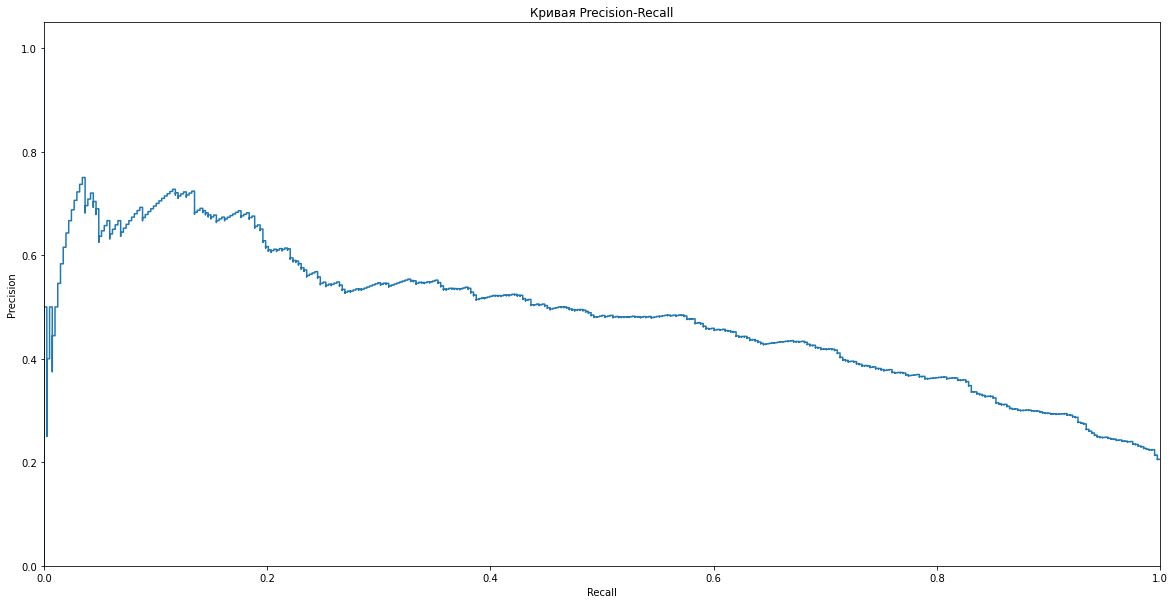

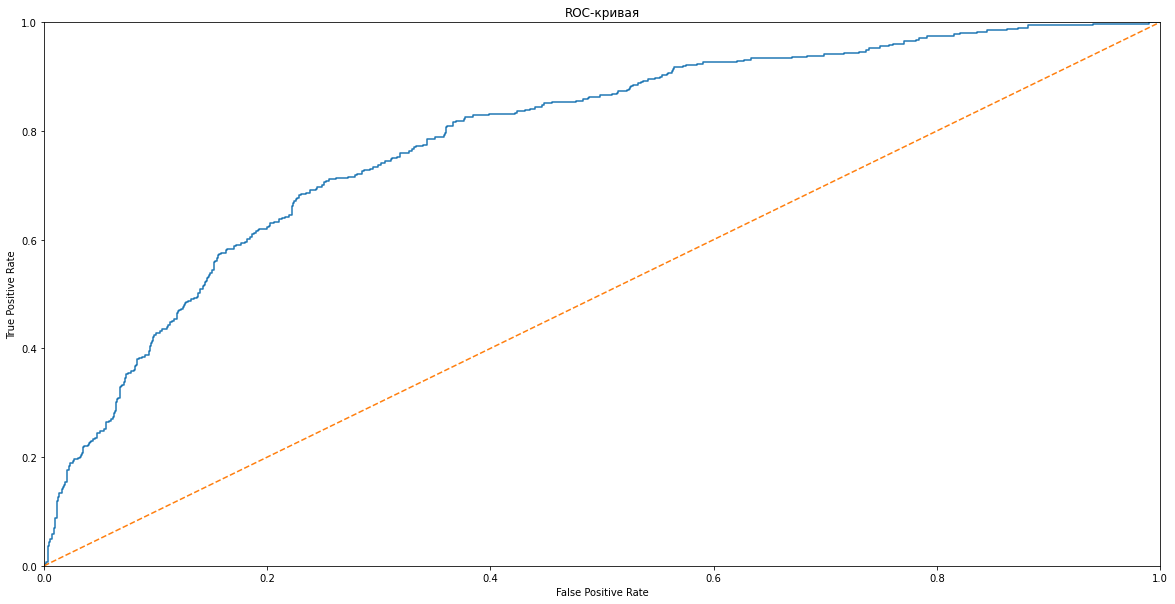

ROC_AUC 0.7875698960488718


In [25]:
roc_auc_scores(features_valid, target_valid, lr)

У логистической регрессии получилось : F1-мера 0.30, ROC_AUC 0.78

### Случайный лес

In [26]:
'''
найдем лучшие параметры  в случайном лееосчитаем
качество и найдем лучшие параметры  в случайном леc
'''
best_f1_score = 0 
best_accuracy = 0
best_depth = 0
for depth in range(1,10):
    for est in range(5,50,5):
        rfc = RandomForestClassifier(
            max_depth = depth,n_estimators=est,
            random_state=12345)
        rfc.fit(features_train, target_train)
        rfc_predictions = rfc.predict(features_valid)
        rfc_f1_score = f1_score(rfc_predictions, target_valid)
        if  rfc_f1_score > best_f1_score:
            best_f1_score = rfc_f1_score
            best_depth = depth
            best_est = est
print("Глубина дерева:", best_depth, "Количество деревьев:", best_est,'F1:', best_f1_score )

Глубина дерева: 9 Количество деревьев: 5 F1: 0.6008968609865472


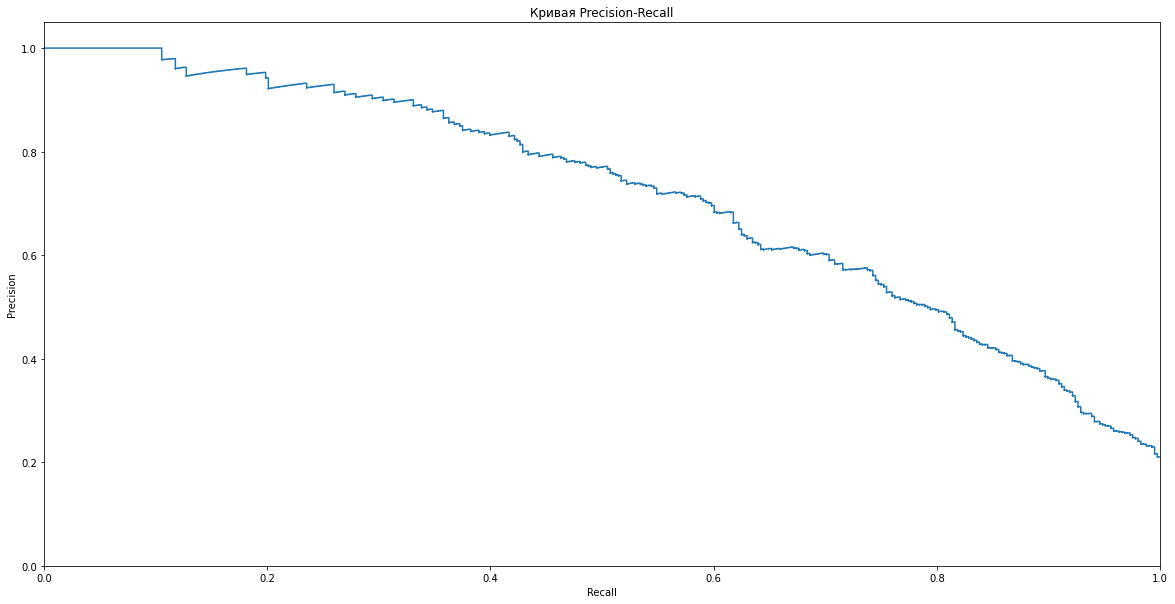

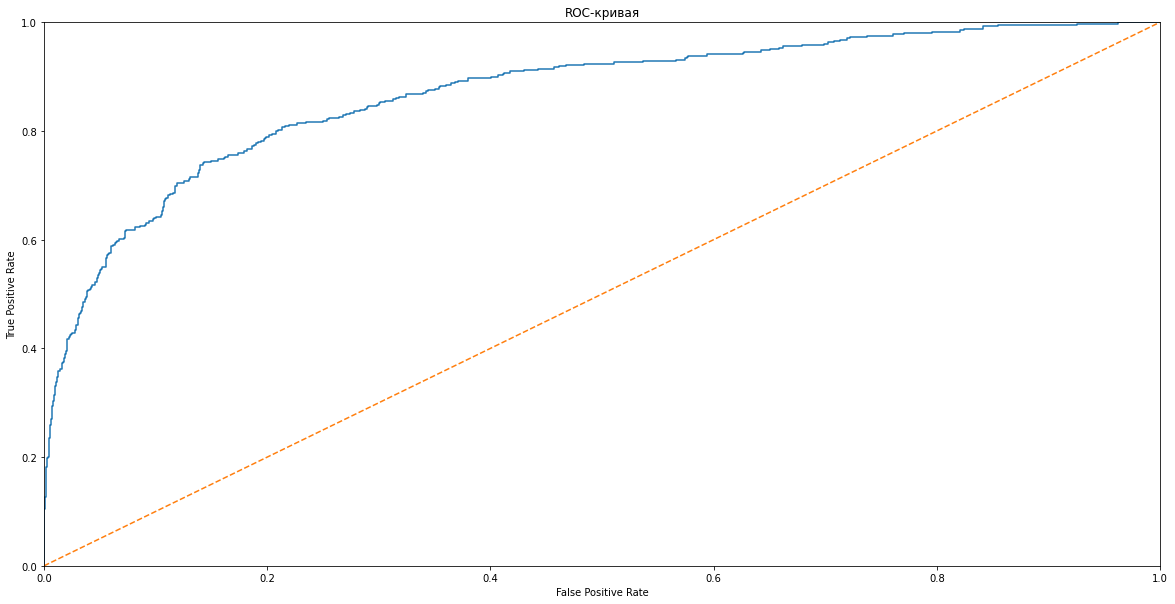

ROC_AUC 0.8691281160705489


In [27]:
roc_auc_scores(features_valid, target_valid, rfc)

У случайного леса после подбора глубины и кол-ва деревьев результат лучше чем у логистической регрессии. F1-мера 0.60, ROC_AUC 0.85

***Вывод***
У логистической регрессии результат : F1-мера 0.30 ROC_AUC 0.78

У случайного леса после подбора глубины и кол-ва деревьев результат лучше чем у логистической регрессии. F1  0.60, ROC_AUC 0.85

## Борьба с дисбалансом

### Upsampling

In [28]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [29]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
target_upsampled.value_counts()

True     4888
False    4778
Name: Exited, dtype: int64

In [30]:
lr_up = LogisticRegression()
lr_up.fit(features_upsampled, target_upsampled)
lr_predictions_up = lr_up.predict(features_valid)
f1_score(lr_predictions_up, target_valid)
print('F1:',f1_score(lr_predictions_up, target_valid))

F1: 0.5246753246753246


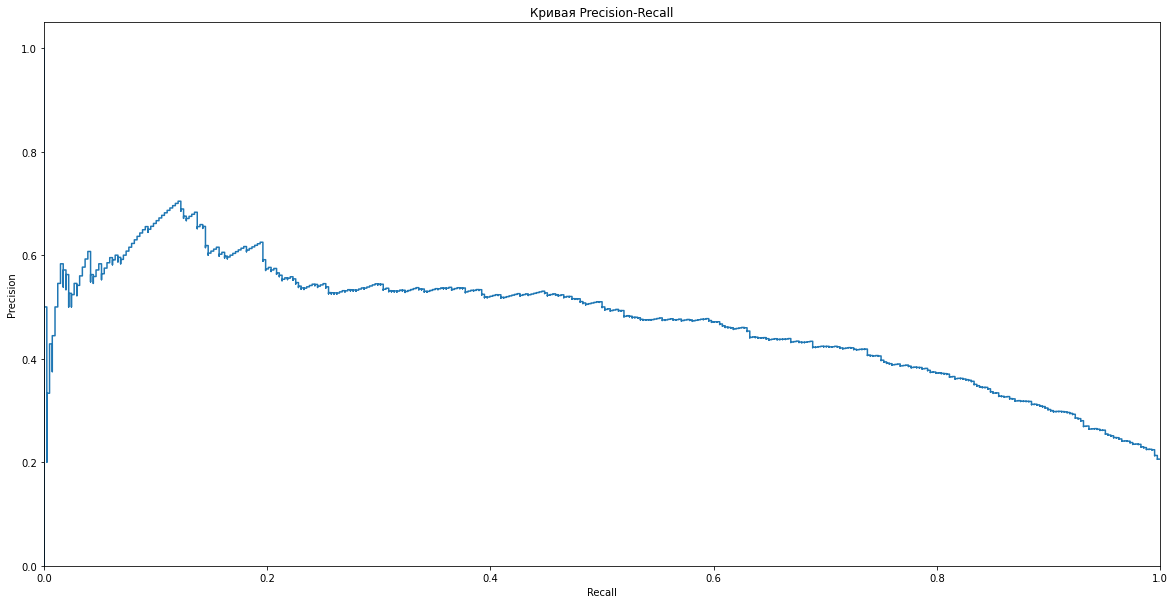

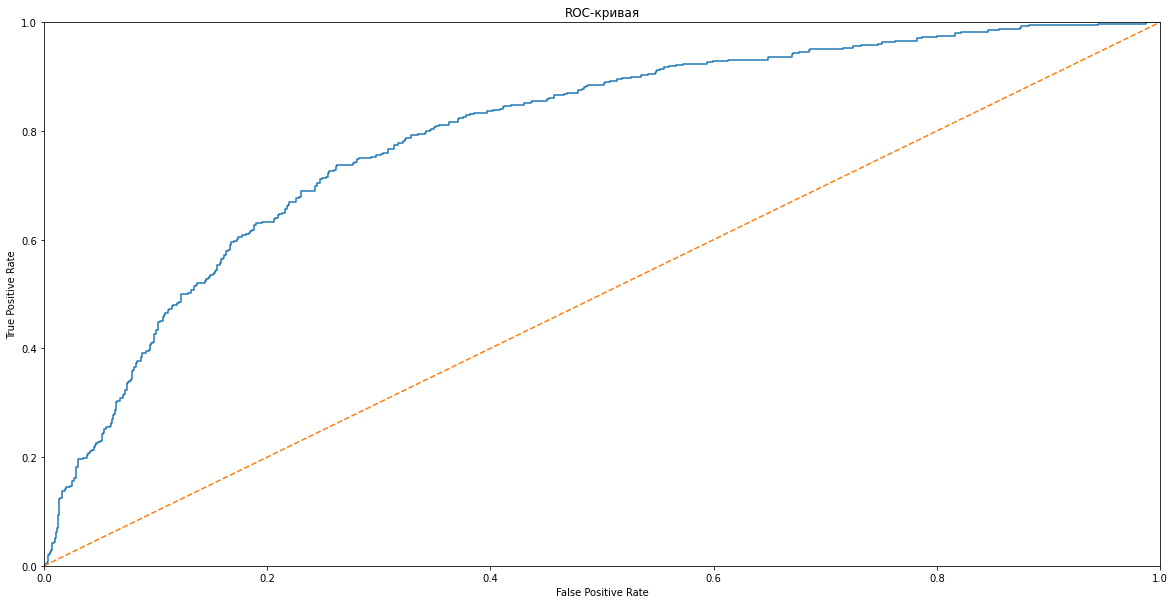

ROC_AUC 0.7937789437382993


In [31]:
roc_auc_scores(features_valid, target_valid, lr_up)

После применения upsempling у логистического регрессии f1-мера выросла с 0.30 до 0.52 , roc_auc стала 0.79 была 0.78

In [32]:
best_f1_score = 0
best_accuracy = 0
best_depth = 0
for depth in range(1,10):
    for est in range(5,50,5):
        rfc_up = RandomForestClassifier(
            max_depth = depth,n_estimators=est,
            random_state=12345)
        rfc_up.fit(features_upsampled, target_upsampled)
        rfc_predictions_up = rfc_up.predict(features_valid)
        rfc_f1_score = f1_score(rfc_predictions_up, target_valid)
        if  rfc_f1_score > best_f1_score:
            best_f1_score = rfc_f1_score
            best_depth = depth
            best_est = est
print("Глубина дерева:", best_depth, "Количество деревьев:", best_est, 'F1:', best_f1_score)

Глубина дерева: 9 Количество деревьев: 40 F1: 0.6525871172122493


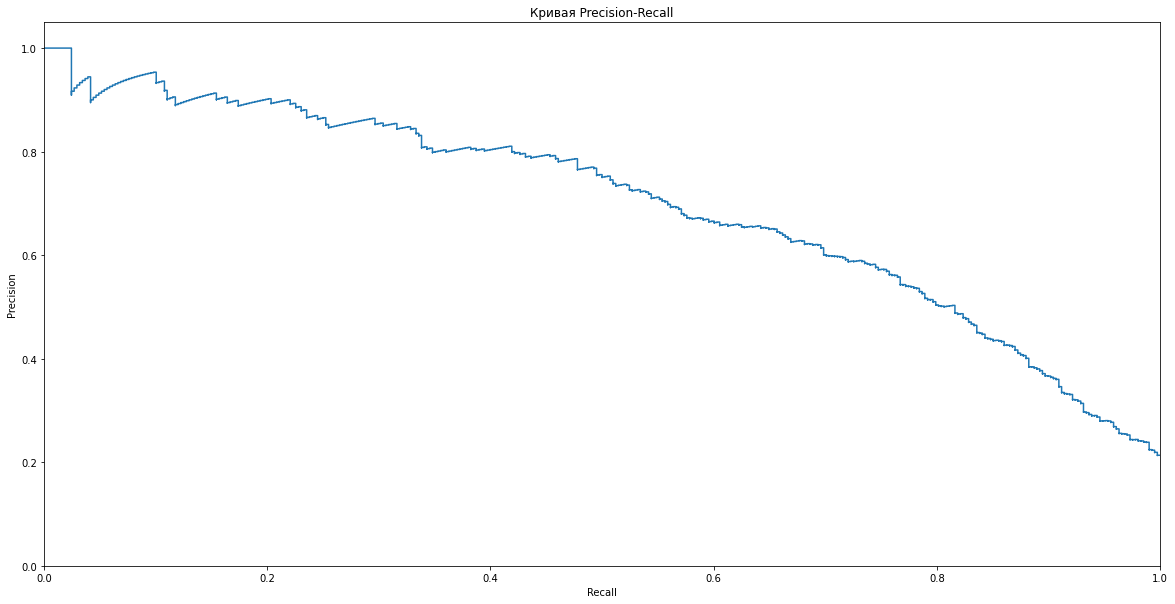

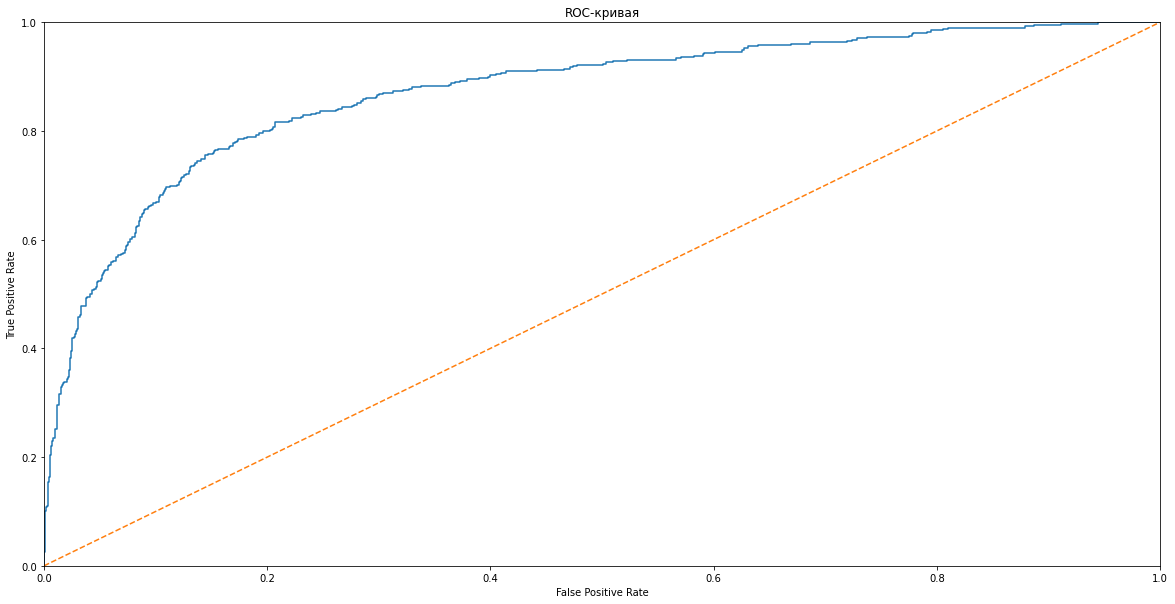

ROC_AUC 0.8713004360035472


In [33]:
roc_auc_scores(features_valid, target_valid, rfc_up)

***Ввывод*** 
до применения Upsampling У логистической регрессии результат было : F1-мера 0.30 ROC_AUC 0.78. Стало : f1-мера 0.52 , ROC_AUC 0.793

у случайного леса было F1  0.60, ROC_AUC 0.85. стало F1-мера 0.652, ROC_AUC 0.87


### Downsampling

In [34]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [35]:
features_downsampled_train, target_downsampled_train = downsample(features_train, target_train, fraction=0.5)
target_downsampled_train.value_counts()

False    2389
True     1222
Name: Exited, dtype: int64

In [36]:
lr_dw = LogisticRegression()
lr_dw.fit(features_downsampled_train, target_downsampled_train)
lr_predictions_dw = lr_dw.predict(features_valid)
print('F1:',f1_score(lr_predictions_dw, target_valid))

F1: 0.48717948717948717


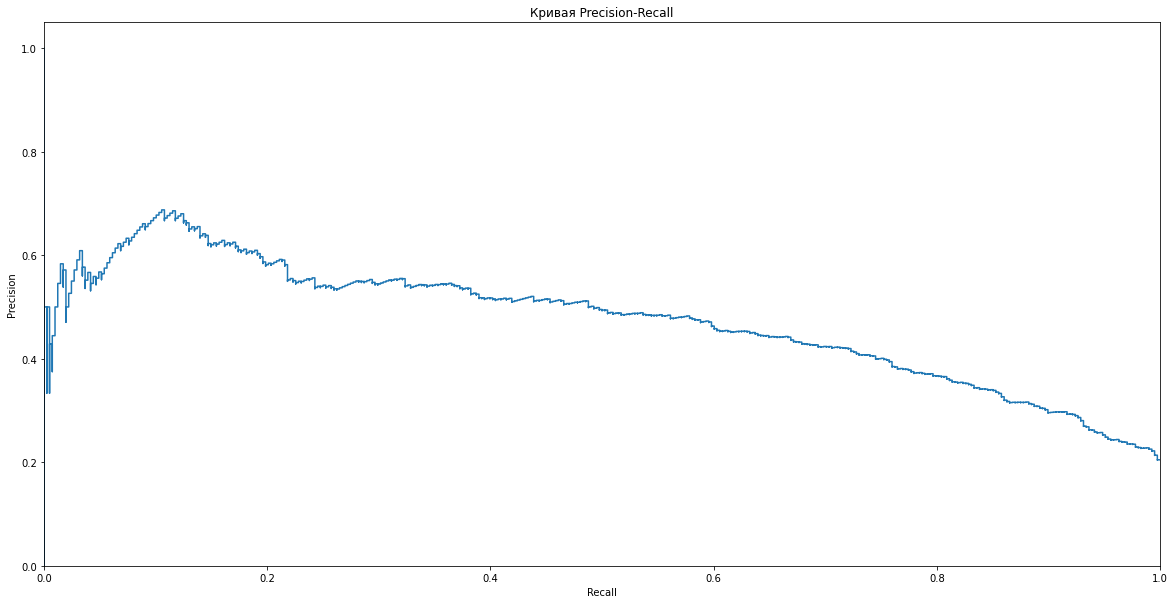

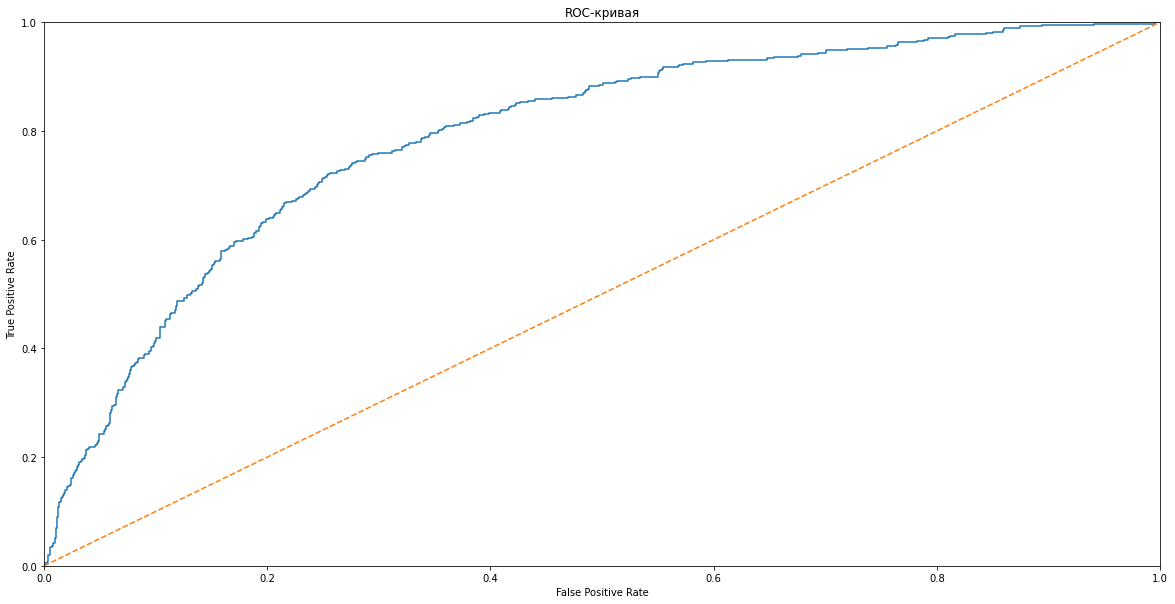

ROC_AUC 0.7916097029263968


In [37]:
roc_auc_scores(features_valid, target_valid, lr_dw)

После применения downsempling у логистического регрессии f1-мера с 0.30 стала 0.48, roc_auc 0.79

In [38]:
best_f1_score = 0
best_accuracy = 0
best_depth = 0
for depth in range(1,10):
    for est in range(5,50,5):
        rfc_dw = RandomForestClassifier(
            max_depth = depth,n_estimators=est,
            random_state=12345)
        rfc_dw.fit(features_downsampled_train, target_downsampled_train)
        rfc_predictions_dw = rfc_dw.predict(features_valid)
        rfc_f1_score = f1_score(rfc_predictions_dw, target_valid)
        if  rfc_f1_score > best_f1_score:
            best_f1_score = rfc_f1_score
            best_depth = depth
            best_est = est
print('Глубина дерева:', best_depth, 'Количество деревьев:', best_est, 'F1:', best_f1_score)

Глубина дерева: 9 Количество деревьев: 40 F1: 0.6469833119383827


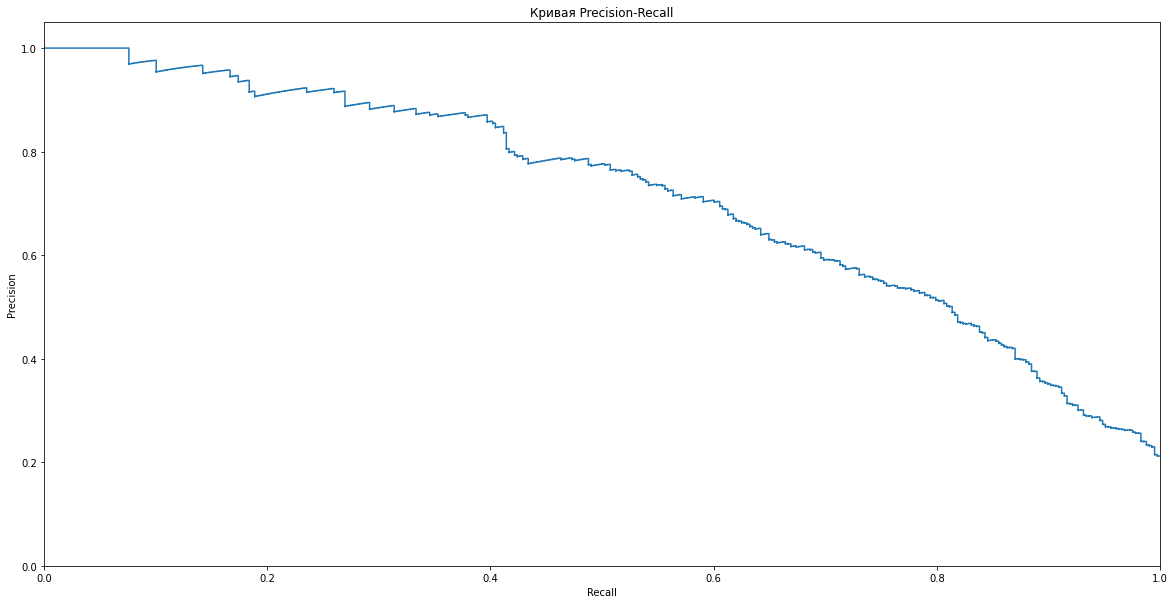

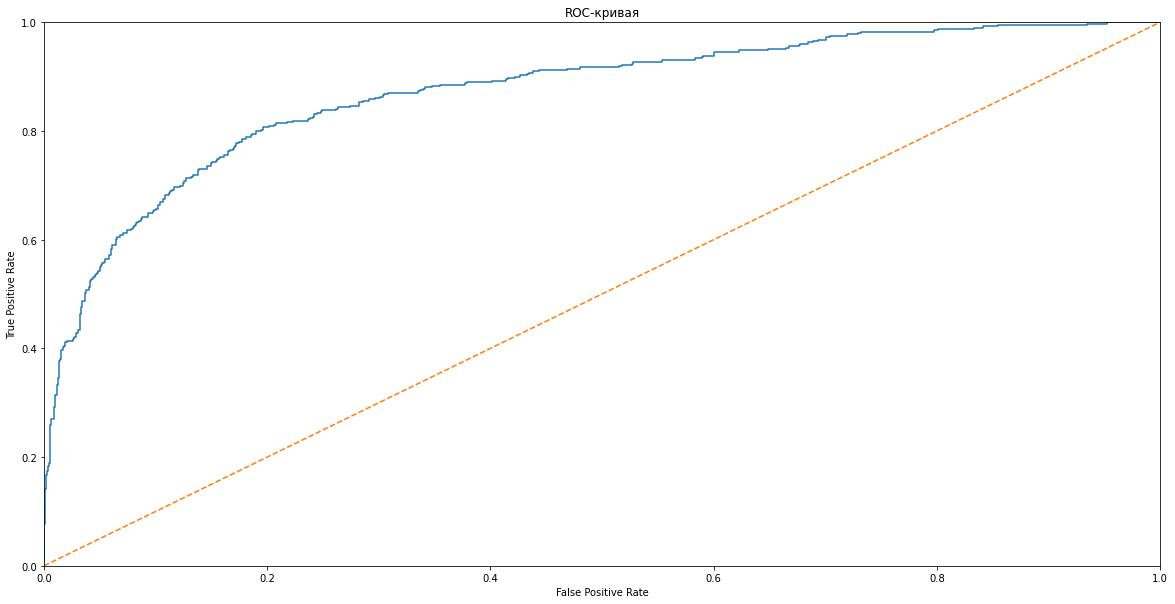

ROC_AUC 0.8716345206424279


In [39]:
roc_auc_scores(features_valid, target_valid, rfc_dw)

***Вывод***
До применения Downsampling у логистической регрессии результат было : F1-мера 0.30 ROC_AUC 0.78. Стало : f1-мера 0.48 , ROC_AUC 0.793

В случайно лесе до Downsampling было F1  0.60, ROC_AUC 0.85
после стало: F1 0.646, ROC_AUC 0.87

### Использование гиперпараметра в случаном лесе

In [40]:
best_f1_score = 0
best_accuracy = 0
best_depth = 0
for depth in range(1,10):
    for est in range(5,50,5):
        rfc_bl = RandomForestClassifier(
            max_depth = depth,n_estimators=est,
            random_state=12345, class_weight='balanced')
        rfc_bl.fit(features_train, target_train)
        rfc_predictions_bl = rfc_bl.predict(features_valid)
        rfc_f1_score = f1_score(rfc_predictions_bl, target_valid)
        if  rfc_f1_score > best_f1_score:
            best_f1_score = rfc_f1_score
            best_depth = depth
            best_est = est
print("Глубина дерева:", best_depth, "Количество деревьев:", best_est,'F1:', best_f1_score)

Глубина дерева: 9 Количество деревьев: 45 F1: 0.6511627906976745


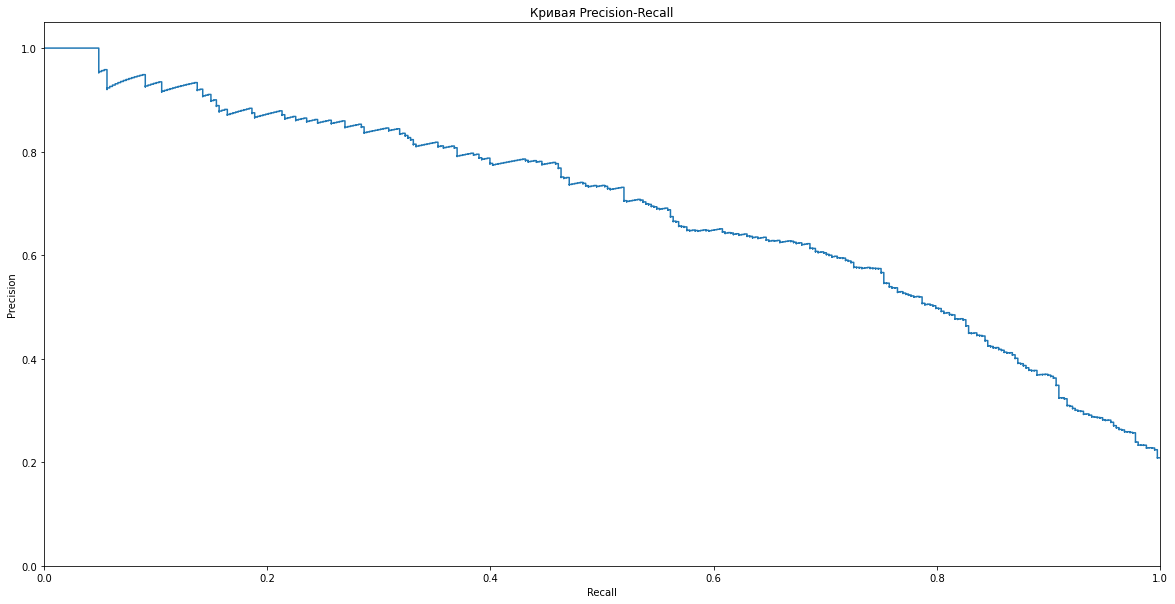

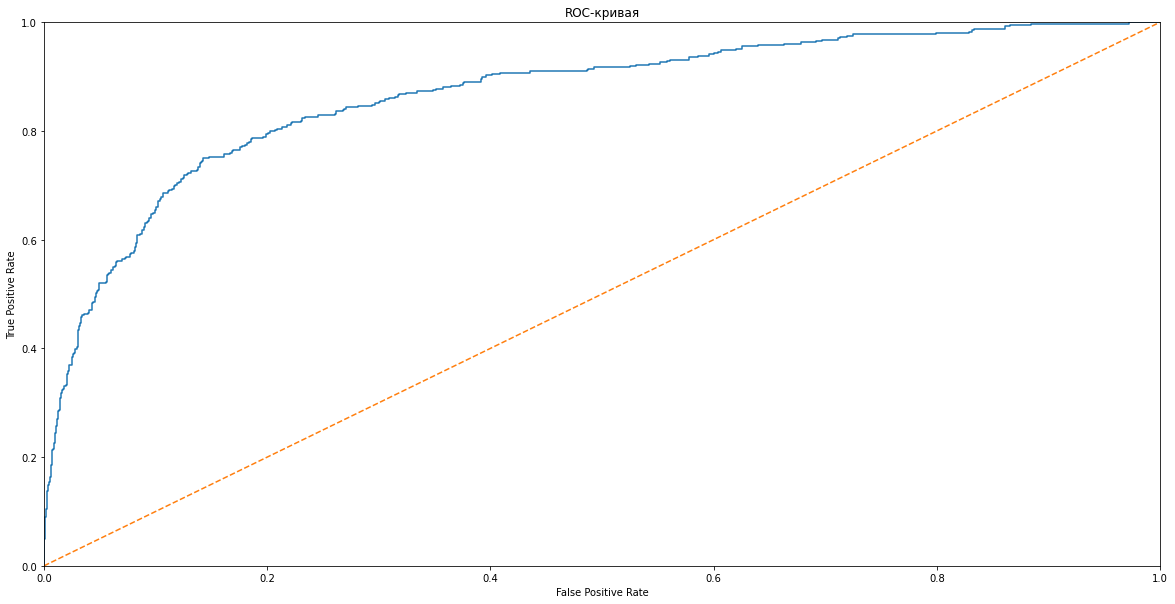

ROC_AUC 0.8667187038131836


In [41]:
roc_auc_scores(features_valid, target_valid, rfc_bl)

***Вывод*** Гипер-параметр class_weight='balanced' в случаном дереве показал результат.,было  F1 0.60, ROC_AUC 0.85 
стало 0.651, ROC_AUC 0.86
близкий к результатам upsempling

## Тестирование модели

In [42]:
lr = LogisticRegression()
lr.fit(features_upsampled, target_upsampled)
lr_predictions = lr.predict(features_test)
print('F1:',f1_score(lr_predictions, target_valid))

F1: 0.2525597269624574


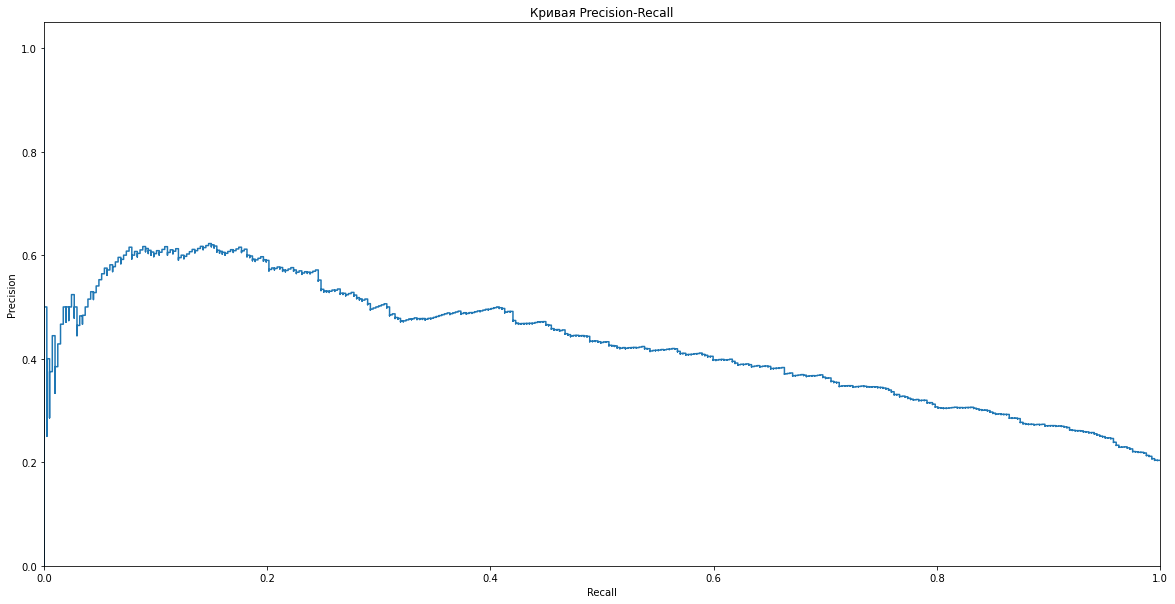

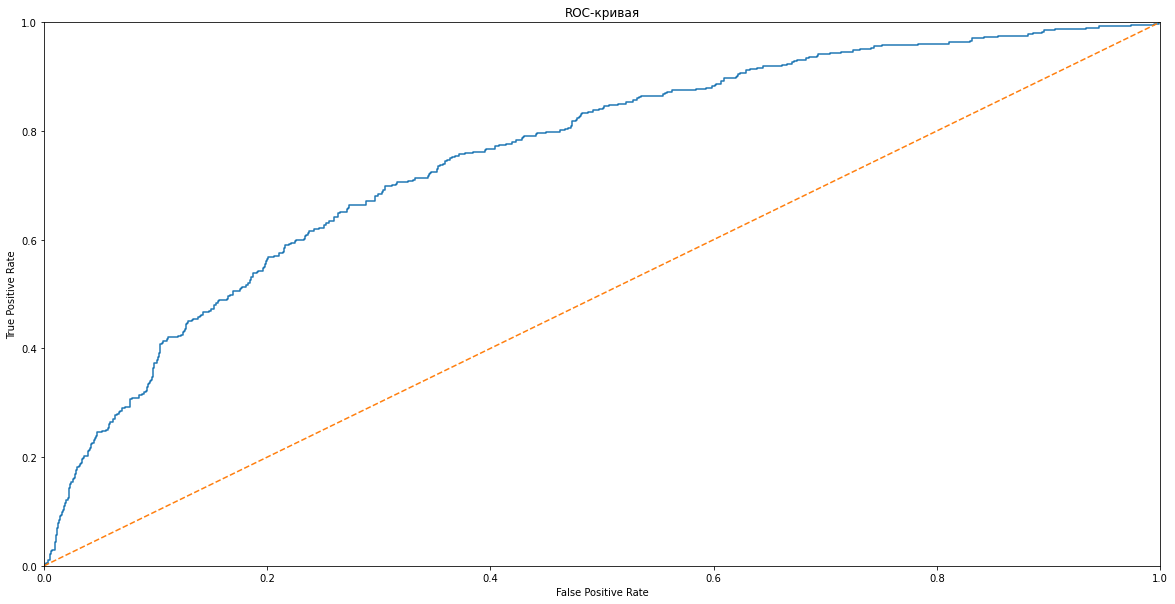

ROC_AUC 0.7541748219714322


In [43]:
roc_auc_scores(features_test, target_test, lr)

In [44]:
# проверим class_weight='balanced'
rfc_bl = RandomForestClassifier(max_depth=9,
                                n_estimators=45 ,class_weight='balanced', random_state=12345)
rfc_bl.fit(features_train, target_train)
rfc_predictions_bl = rfc_bl.predict(features_test)
rfc_f1_score = f1_score(rfc_predictions_bl, target_test)
model_scores(rfc_predictions_bl, target_test)

Accuracy: 0.8345
Матрица ошибок: [[ 257  150]
 [ 181 1412]]
Recall: 0.6314496314496314
Precision: 0.58675799086758
F1: 0.6082840236686391


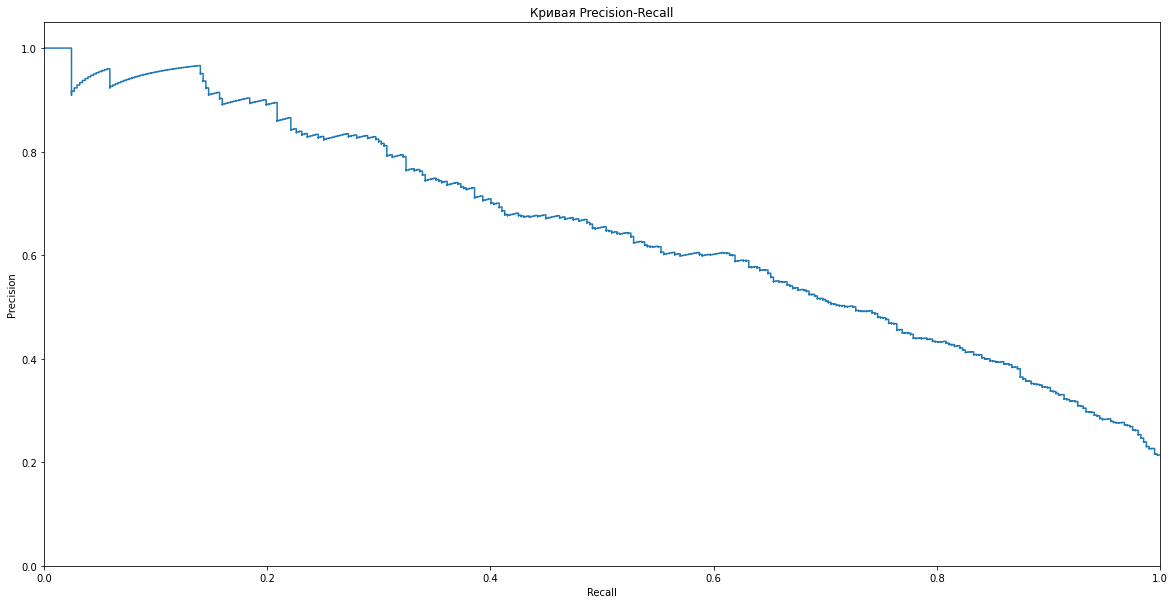

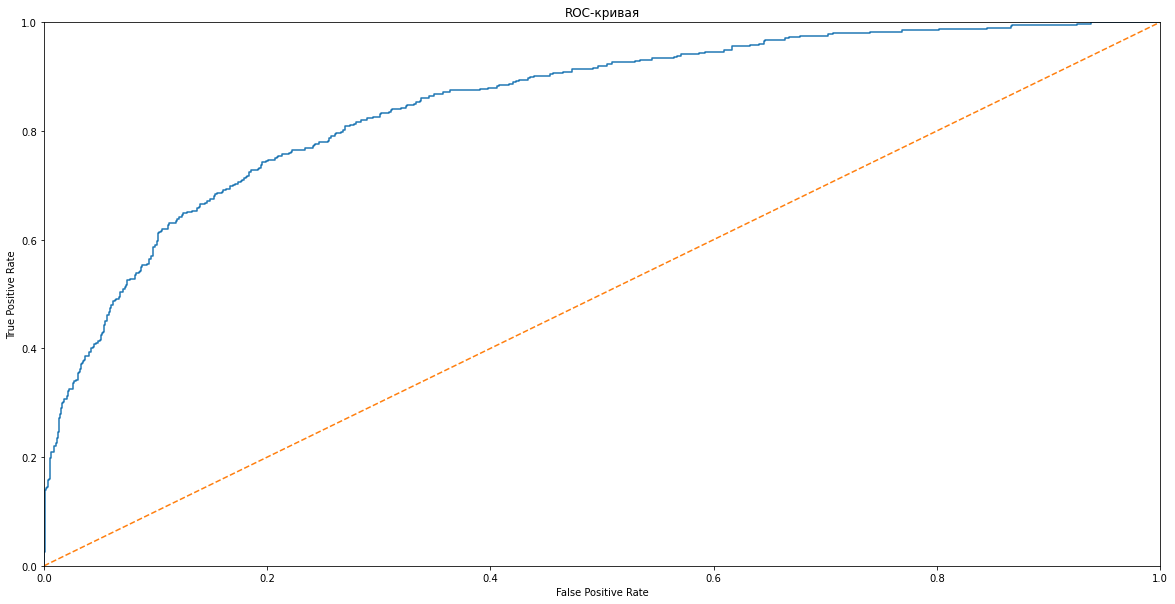

ROC_AUC 0.8500858331366806


In [45]:
roc_auc_scores(features_test, target_test, rfc_bl)

In [46]:
# проверим upsampling
rfc_up = RandomForestClassifier(max_depth=9,
                                n_estimators=40, random_state=12345)
rfc_up.fit(features_upsampled, target_upsampled)
rfc_predictions_up = rfc_up.predict(features_test)
rfc_f1_score = f1_score(rfc_predictions_up, target_test)
model_scores(rfc_predictions_up, target_test)

Accuracy: 0.8175
Матрица ошибок: [[ 281  126]
 [ 239 1354]]
Recall: 0.6904176904176904
Precision: 0.5403846153846154
F1: 0.6062567421790722


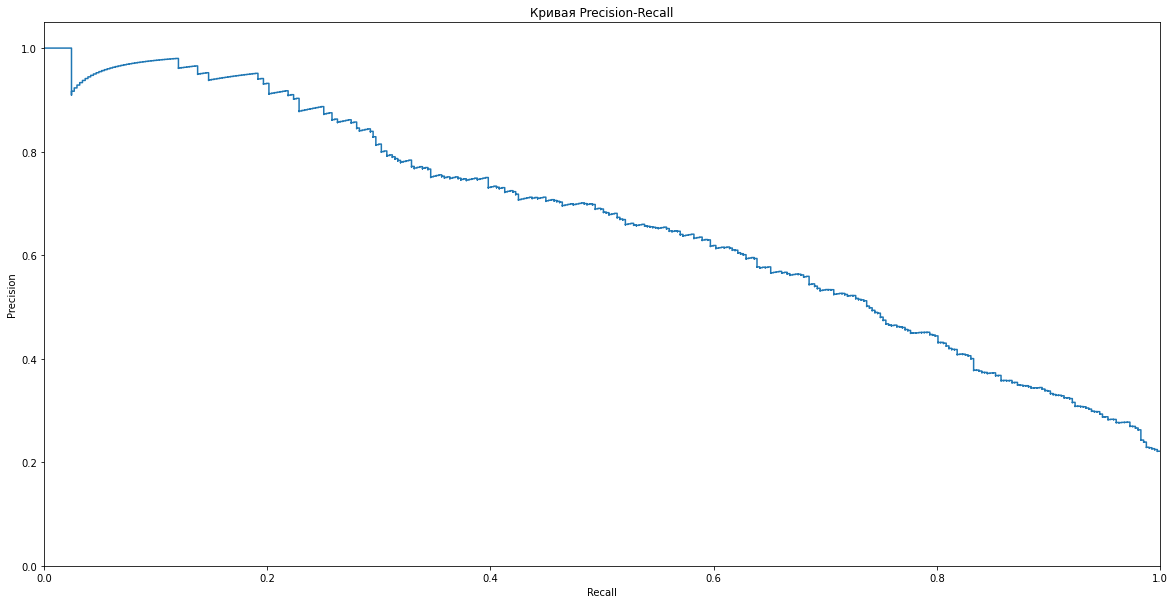

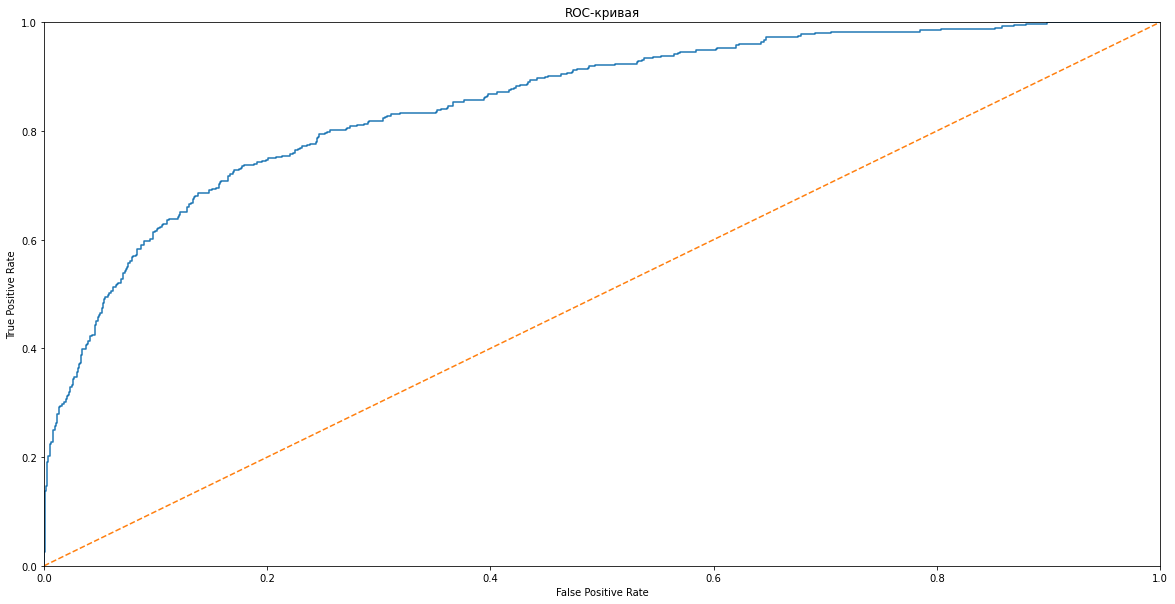

ROC_AUC 0.8527572256385816


In [47]:
roc_auc_scores(features_test, target_test, rfc_up)

В приниципе что upsampling что использование class_weight='balanced' с подобранными параметрами слученого дерева показали почти схожий результаты разница f1-меры оказалась 0.002 в пользу class_weight='balanced'

In [48]:
rfc_imp = pd.Series(rfc_bl.feature_importances_,features.columns)

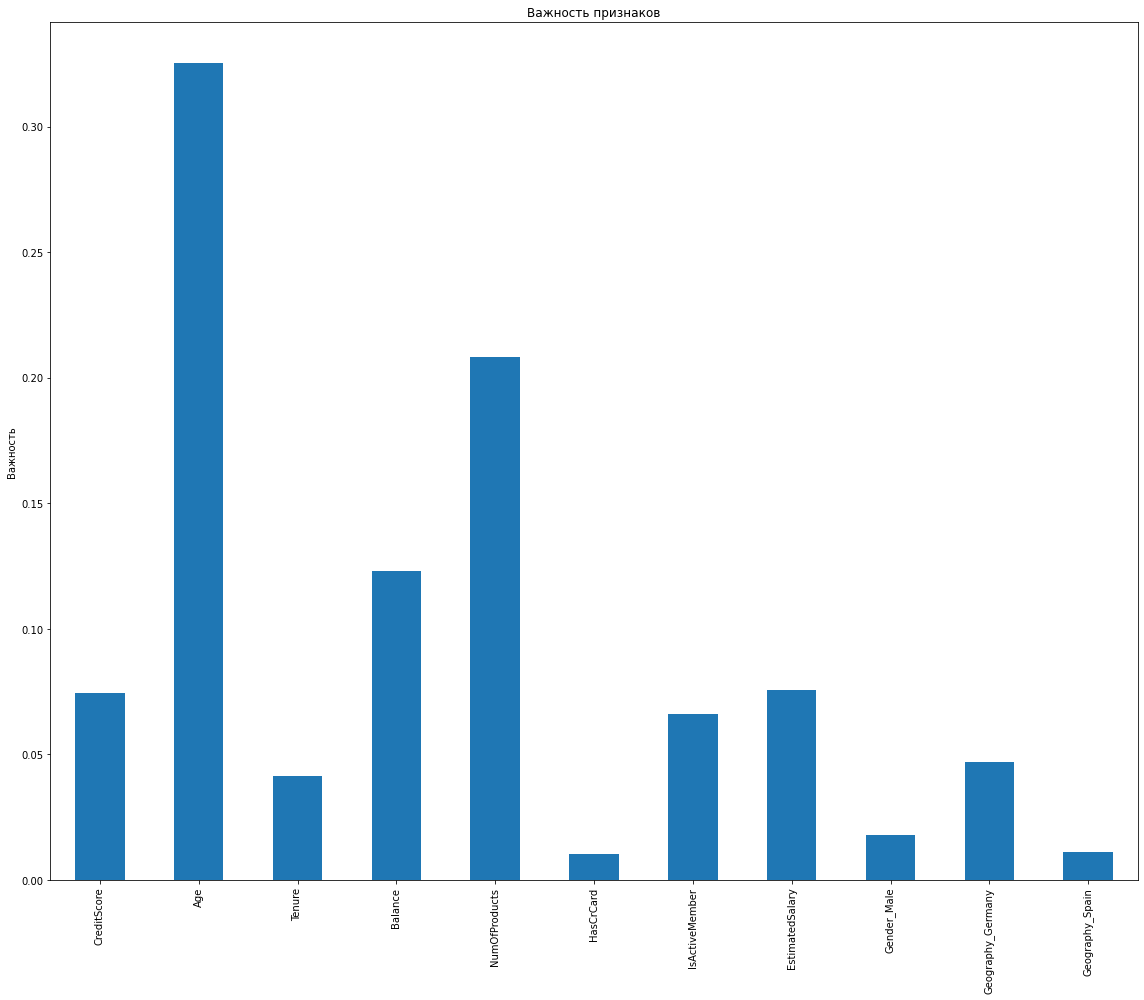

In [49]:
fig, ax = plt.subplots(figsize=(16,14))
rfc_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность')
fig.tight_layout()

##### Вывод: 

Произвели предобработку данных, заполнили пропуски медианными значениями, прошкалировали количественные переменные, сделали One_hot_encoding. 

До борьбы с дисбалансом показывала результат метрики логистическая регерссия : F1-мера 0.30 ROC_AUC 0.78
Произведя upsampling положительного класса, благодаря чему удалось повысить f1 меру для логистической регресси с 0.30  до 0.52 , ROC_AUC увеличилась до 0.793 
При  проверке downsampling у логистической регрессии результат было : F1-мера 0.30 ROC_AUC 0.78. Стало : f1-мера 0.48 , ROC_AUC 0.793

Случайный лес после подбора глубины и кол-ва деревьев показал результат лучше чем у логистической регрессии. F1 0.60, ROC_AUC 0.85
У случайного леса было до Upsampling метрики были: F1 0.60, ROC_AUC 0.85
стало F1-мера 0.65, ROC_AUC 0.87 
В случайном лесе до Downsampling было F1 0.60, ROC_AUC 0.85
после стало: F1 0.646, ROC_AUC 0.87

Далее был проверен гиперпараметр class_weight='balanced' в случаном лесе 
Данный парамерт показал наилучший результат. было F1 0.60, ROC_AUC 0.85
стало 0.651, ROC_AUC 0.86

Лучший результат показала модель случаного леса по сравнению с логистической регрессией.

Призведя проверку на тестовой выборке  моедль случаного леса с гиперпараметром class_weight='balanced' показла реультат  F1 0.6082840236686391, ROC_AUC 0.8500858331366806
также была была преоведена проверка тестовой выбокри с использованием upsampling
результаты оказались близки к результатам class_weight='balanced': F1: 0.6062567421790722, ROC_AUC 0.8527572256385816

При анализе важности фатокров построения модели было выявлено большую важность несут Возраст клиент, количество используемых продуктов и баланс